In [3]:
#Shishir Khanal
#July 5, 2025
#AutoRegressive Integrated Moving Average Model
#pip install pmdarima
import numpy as np
import pandas as pd
%matplotlib inline
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [5]:
df1 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq='D'
df1 = df1[:120]
df2 = pd.read_csv('TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

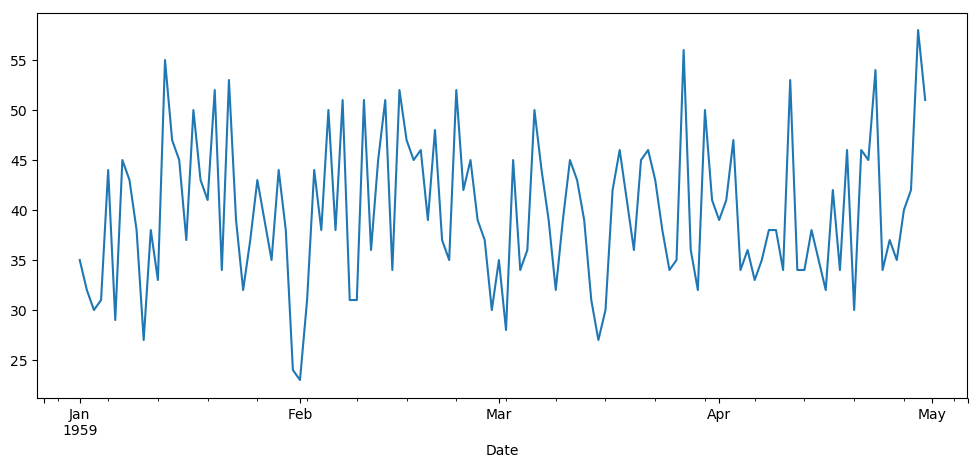

In [7]:
df1['Births'].plot(figsize=(12,5))

In [12]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented D-F Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') #dropna to handle differenced data

    labels = ['ADF test statistic', 'p-value','# lags used', '# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})'] = val

    print(out.to_string()) #convert fom float64 to string

    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root and is non-stationary")

In [13]:
adf_test(df1['Births'],'Births')

Augmented D-F Test: Births
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [14]:
auto_arima(df1['Births'],seasonal='False').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Sat, 05 Jul 2025   AIC                            823.489
Time:                        16:39:52   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [16]:
model = ARMA(train['Births'],order=(2,2))
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42466D+00    |proj g|=  1.75925D-02

At iterate    5    f=  3.42158D+00    |proj g|=  4.01208D-03

At iterate   10    f=  3.42120D+00    |proj g|=  1.12932D-04

At iterate   15    f=  3.42119D+00    |proj g|=  1.28106D-03

At iterate   20    f=  3.42116D+00    |proj g|=  6.59028D-05

At iterate   25    f=  3.42116D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     38      1     0     0   

 This problem is unconstrained.


In [18]:
start = len(train)
end = len(train) + len(test) - 1

In [20]:
predictions = results.predict(start,end).rename('ARMA (2,2) Predictions')
predictions

1959-04-01    39.982226
1959-04-02    39.992610
1959-04-03    39.809831
1959-04-04    39.848172
1959-04-05    39.761538
1959-04-06    39.794253
1959-04-07    39.750499
1959-04-08    39.772832
1959-04-09    39.749660
1959-04-10    39.763666
1959-04-11    39.750990
1959-04-12    39.759431
1959-04-13    39.752353
1959-04-14    39.757336
1959-04-15    39.753334
1959-04-16    39.756243
1959-04-17    39.753963
1959-04-18    39.755651
1959-04-19    39.754346
1959-04-20    39.755322
1959-04-21    39.754574
1959-04-22    39.755137
1959-04-23    39.754707
1959-04-24    39.755032
1959-04-25    39.754785
1959-04-26    39.754972
1959-04-27    39.754829
1959-04-28    39.754937
1959-04-29    39.754855
1959-04-30    39.754917
Freq: D, Name: ARMA (2,2) Predictions, dtype: float64

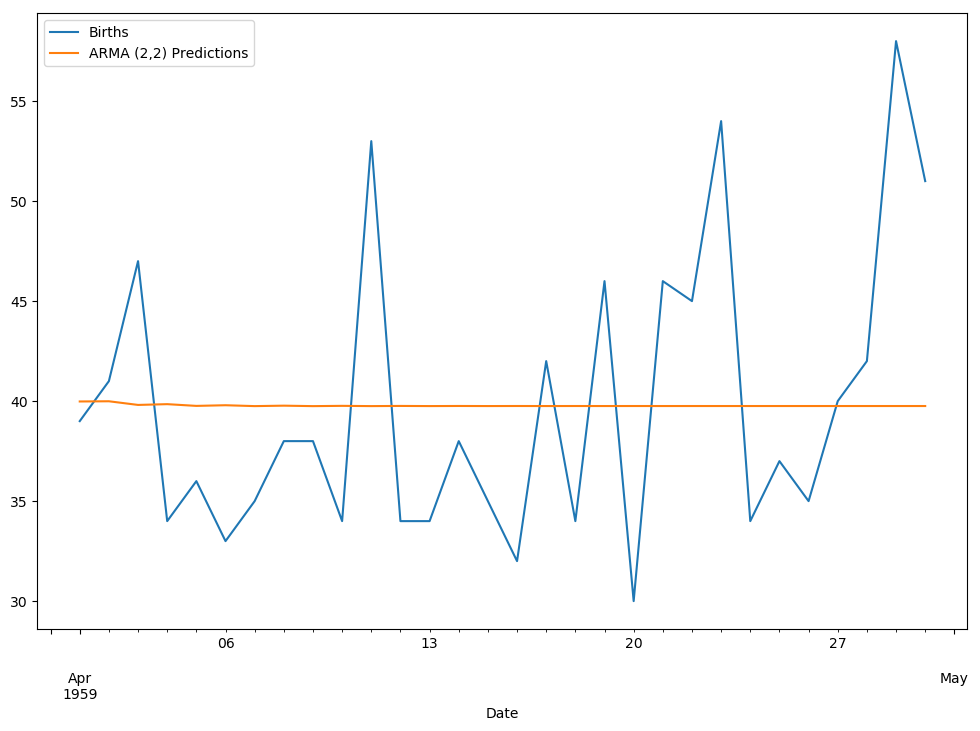

In [24]:
test["Births"].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [25]:
test.mean()

Births    39.833333
dtype: float64

In [26]:
predictions.mean()

39.77743337732267

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

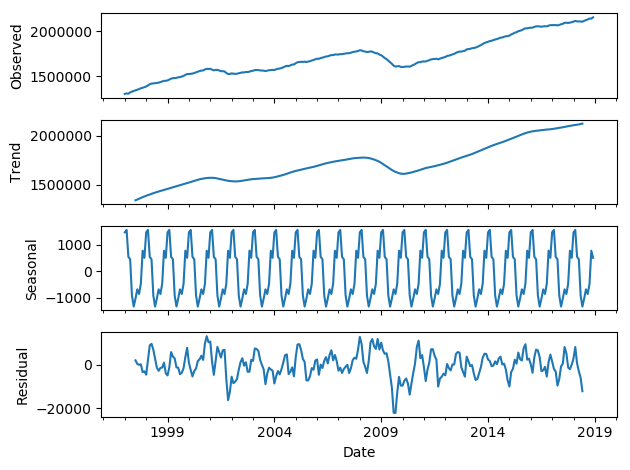

In [29]:
result = seasonal_decompose(df2['Inventories'],model='add')
result.plot();

In [30]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.257
Date:                Sat, 05 Jul 2025   AIC                           5228.505
Time:                        16:51:47   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3483.5062   1314.300      2.650      0.009     907.526    6059.487
ar.L1.D.y      0.9037      0.039     23.414      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.546      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

In [31]:
from statsmodels.tsa.statespace.tools import diff

In [32]:
df2['Diff_1'] = diff(df2['Inventories'],k_diff=1)

In [33]:
adf_test(df2['Diff_1'])

Augmented D-F Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


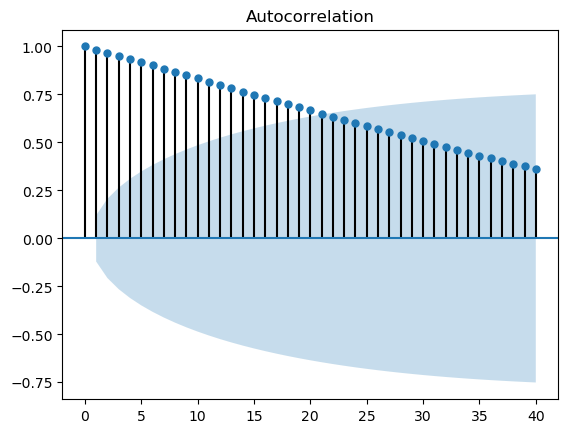

In [48]:
plot_acf(df2['Inventories'],lags=40);

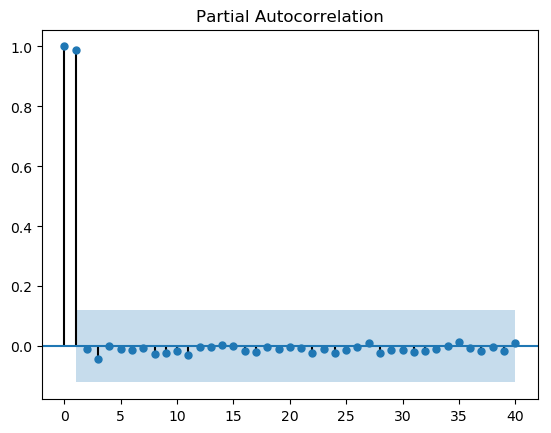

In [49]:
plot_pacf(df2['Inventories'],lags=40);
#Since PACF has large cutoff at lag 1, AR term should be 1

In [38]:
# Duke University choosing parameters for ARIMA
# AR = 1
# I = 1
# MA= 0/1 #Depending on which has less error

In [50]:
stepwise_fit = auto_arima(df2['Inventories'],start_p=0,start_q=0,max_p=2,max_q=2,seasonal=False,trace=True)
stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.053 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.025 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.841, Fit time=0.055 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.529, BIC=5247.390, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.074 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.146 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.448 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.257
Date:                Sat, 05 Jul 2025   AIC                           5228.505
Time:                        18:35:20   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3483.5062   1314.300      2.650      0.009     907.526    6059.487
ar.L1.D.y      0.9037      0.039     23.414      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.546      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

In [40]:
len(df2)

264

In [55]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [56]:
model = ARIMA(train['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.90598D+00    |proj g|=  1.04894D-03

At iterate    5    f=  9.90596D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     12      1     0     0   1.776D-07   9.906D+00
  F =   9.9059562860635246     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Sat, 05 Jul 2025   AIC                           4980.790
Time:                        18:43:34   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5697   1344.873      2.378      0.018     561.666    5833.473
ar.L1.D.Inventories     0.9026      0.039     23.011      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [60]:
start = len(train)
end = len(train) + len(test) - 1
#Typ {linear, levels} => Do you want predictions in terms of original(levels) or differenced(linear) data?
predictions = results.predict(start=start,end=end,typ='levels').rename('ARIMA(1,1,1) Predictions')
#help(results.predict)
predictions

2018-01-01    2.107148e+06
2018-02-01    2.110526e+06
2018-03-01    2.113886e+06
2018-04-01    2.117231e+06
2018-05-01    2.120561e+06
2018-06-01    2.123878e+06
2018-07-01    2.127184e+06
2018-08-01    2.130479e+06
2018-09-01    2.133764e+06
2018-10-01    2.137041e+06
2018-11-01    2.140311e+06
2018-12-01    2.143573e+06
Freq: MS, Name: ARIMA(1,1,1) Predictions, dtype: float64

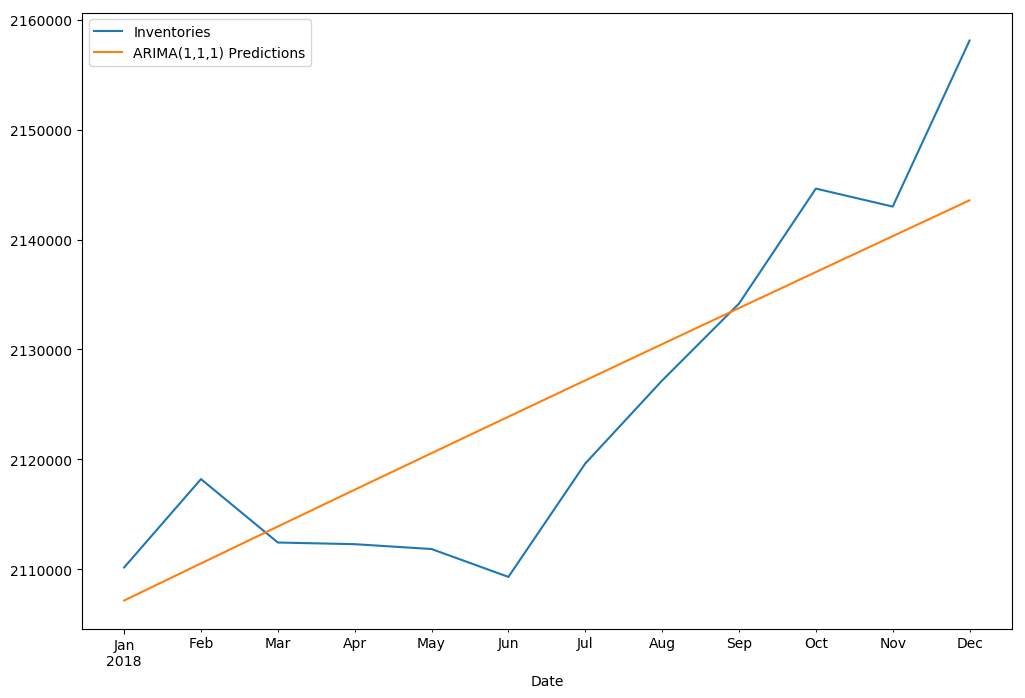

In [61]:
test['Inventories'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [62]:
from statsmodels.tools.eval_measures import rmse

In [63]:
error = rmse(test['Inventories'],predictions)
error

7789.596989413553

In [64]:
test['Inventories'].mean()

2125075.6666666665

In [65]:
predictions.mean()

2125465.2699704454

In [66]:
#Forecast into unknown future

In [68]:
model = ARIMA(df2['Inventories'],order=(1,1,1))
results = model.fit()
fcast = results.predict(start=len(df2),end=len(df2)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.92499D+00    |proj g|=  9.80904D-04

At iterate    5    f=  9.92497D+00    |proj g|=  5.32907D-07

At iterate   10    f=  9.92497D+00    |proj g|=  1.09779D-04

At iterate   15    f=  9.92496D+00    |proj g|=  5.69500D-04

At iterate   20    f=  9.92491D+00    |proj g|=  1.72840D-04

At iterate   25    f=  9.92491D+00    |proj g|=  1.06581D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     50      1     0     0   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


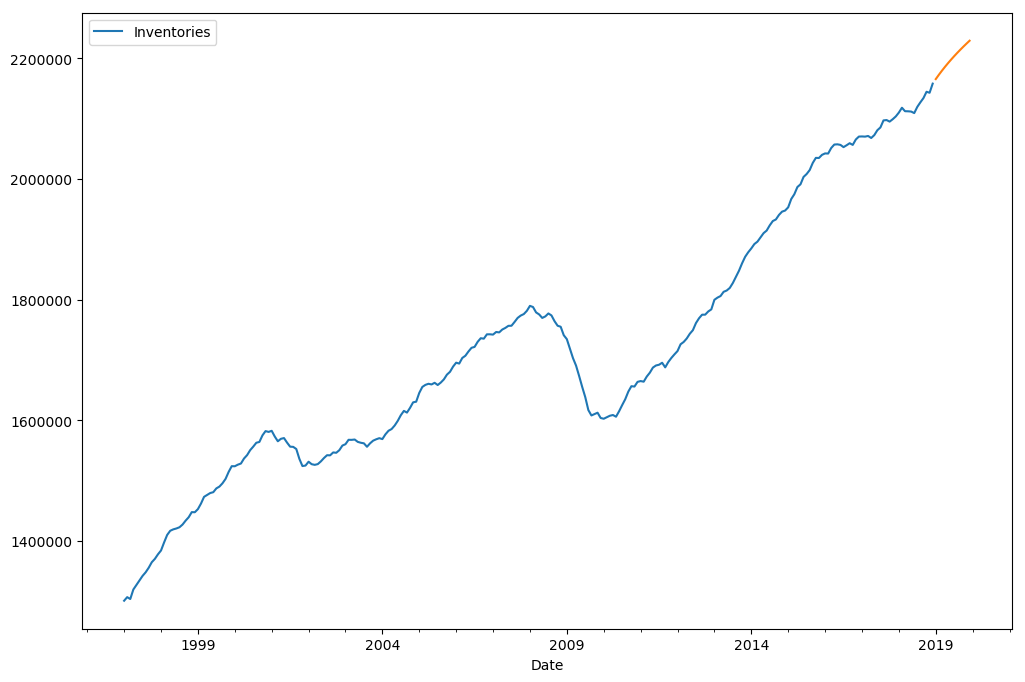

In [69]:
df2['Inventories'].plot(figsize=(12,8),legend=True)
fcast.plot()